EDA for solar farm data

In [5]:
!pip install windrose

## importing  libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from windrose import WindroseAxes
import plotly.express as px

In [12]:
#reading the data 

benin = pd.read_csv(r"C:\Users\hp\Downloads\data (1)\data\benin-malanville.csv")
sierraleone = pd.read_csv(r"C:\Users\hp\Downloads\data (1)\data\sierraleone-bumbuna.csv")
togo = pd.read_csv(r"C:\Users\hp\Downloads\data (1)\data\togo-dapaong_qc.csv")


def summary(data):
    
    print("printing data summary for the country")
    print(data.head())
    print(data.info())
    print(data.describe())
    
                       

summary(benin)
summary(sierraleone)
summary(togo)
                       

printing data summary for the country
          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       Na

checking for invalid and outlier values
Missing Values:
 Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Invalid Values:
                  Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  \
0      2021-08-09 00:01:00 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0   
1      2021-08-09 00:02:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0   
2      2021-08-09 00:03:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3   
3      2021-08-09 00:04:00 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2   
4      2021-08-09 00:05:00 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1   
...          

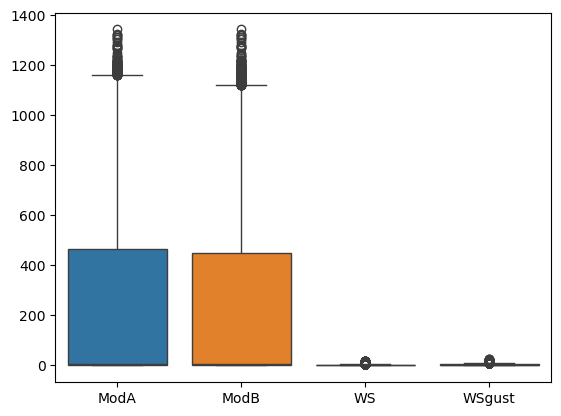

Missing Values:
 Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Invalid Values:
                  Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb     RH   WS  \
0      2021-10-30 00:01:00 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.1  0.0   
1      2021-10-30 00:02:00 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0   
2      2021-10-30 00:03:00 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0   
3      2021-10-30 00:04:00 -0.7  0.0 -0.8   0.0   0.0  21.9   99.3  0.0   
4      2021-10-30 00:05:00 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.3  0.0   
...                    ...  ...  ...  ...   ...

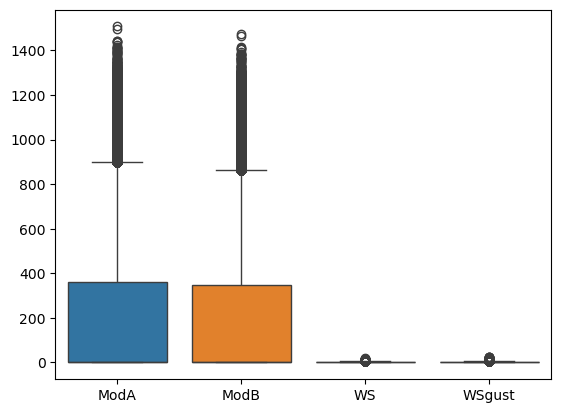

Missing Values:
 Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Invalid Values:
                  Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  \
0      2021-10-25 00:01:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9   
1      2021-10-25 00:02:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1   
2      2021-10-25 00:03:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2   
3      2021-10-25 00:04:00 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2   
4      2021-10-25 00:05:00 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3   
...                    ...  ...  ...  ...   ...   ...

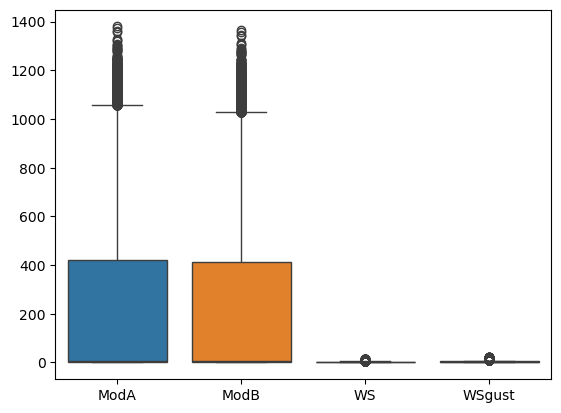

In [14]:
##checking the data 

def checking(data):
    data['Timestamp'] = pd.to_datetime(data['Timestamp'])
    
    missing_values = data.isnull().sum()
    print("Missing Values:\n", missing_values)

    invalid_values = data[(data['GHI'] < 0) | (data['DNI'] < 0) | (data['DHI'] < 0)]
    print("Invalid Values:\n", invalid_values)
    
    sns.boxplot(data=data[['ModA', 'ModB', 'WS', 'WSgust']])
    plt.show()

print("checking for invalid and outlier values")
checking(benin)
checking(sierraleone)
checking(togo)


    




In [22]:
## working


def stat(data):
    print(" calculating the mean, median and mode.....") 
    ghi_mean = data['GHI'].mean()
    dni_median = data['DNI'].median()
    ws_std = data['WS'].std()
    print(f"GHI Mean: {ghi_mean},\n DNI Median: {dni_median},\n Wind Speed Std Dev: {ws_std}")
    
stat(benin)
stat(sierraleone)
stat(togo)


 calculating the mean, median and mode.....
GHI Mean: 240.559452435312,
 DNI Median: -0.1,
 Wind Speed Std Dev: 1.603465884535921
 calculating the mean, median and mode.....
GHI Mean: 201.95751522070017,
 DNI Median: -0.1,
 Wind Speed Std Dev: 1.2392483687513594
 calculating the mean, median and mode.....
GHI Mean: 230.55503976407917,
 DNI Median: 0.0,
 Wind Speed Std Dev: 1.4626676703427106


KPI for benin...
Plot the SIE and DF over time.


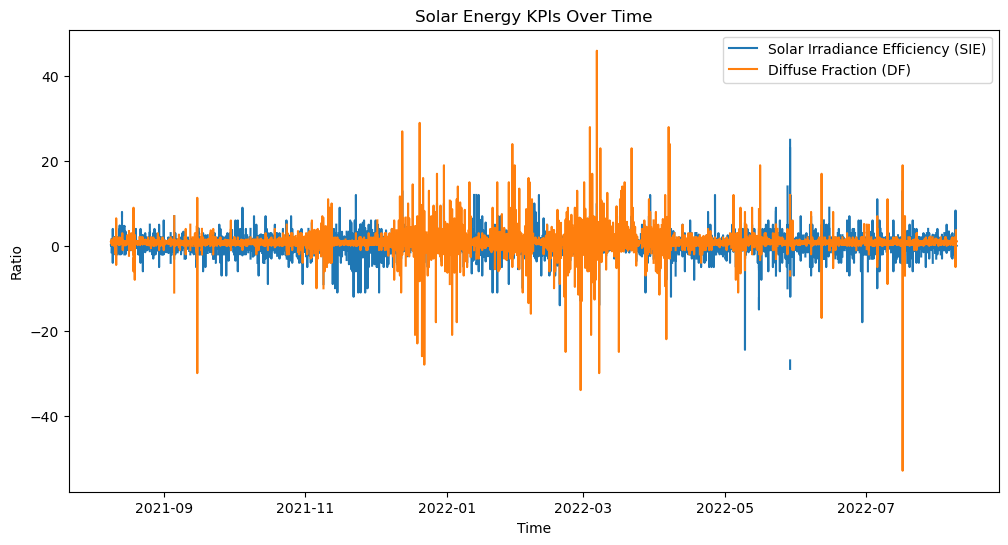

Analyze how cleaning impacts the module readings.
Cleaning Effectiveness (CE):
 ModA    1.298934
ModB    1.319716
dtype: float64
Visualize wind variability (WVI) and barometric pressure fluctuation.


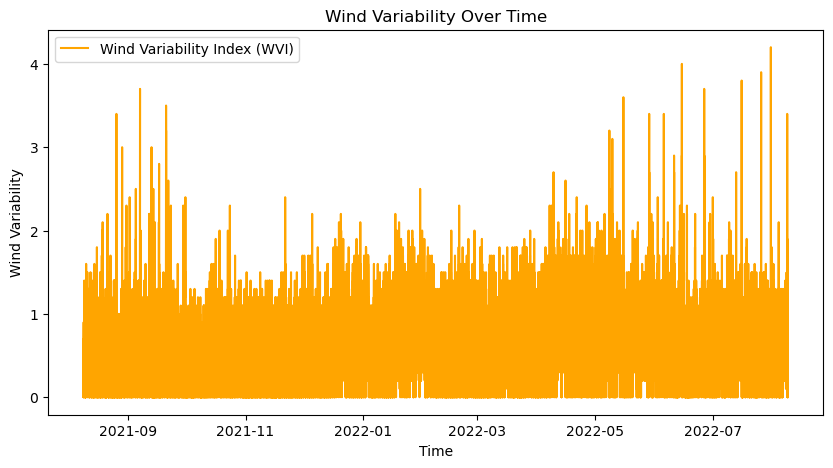

Aggregate KPIs to evaluate trends monthly or yearly.


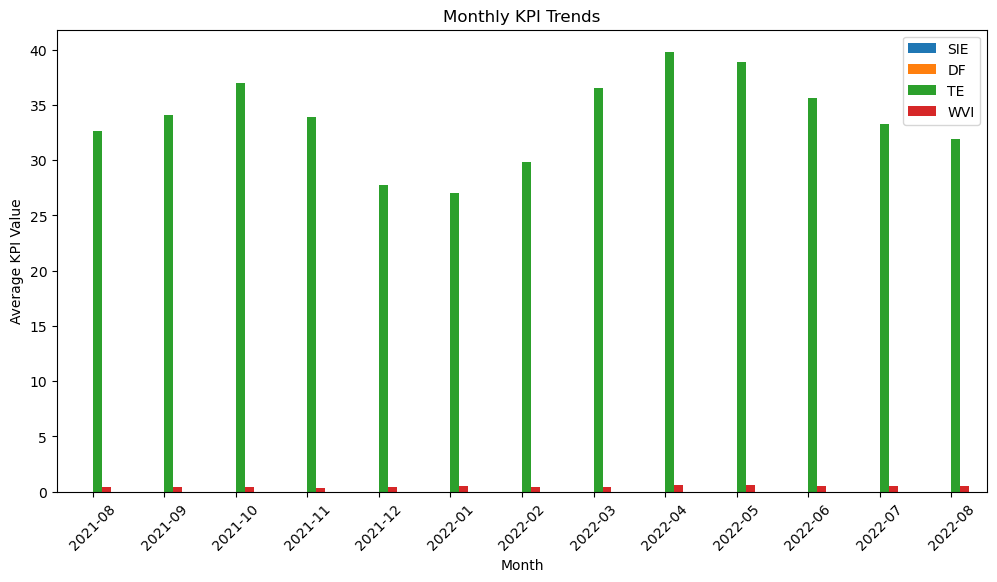

KPI for sierraleone...
Plot the SIE and DF over time.


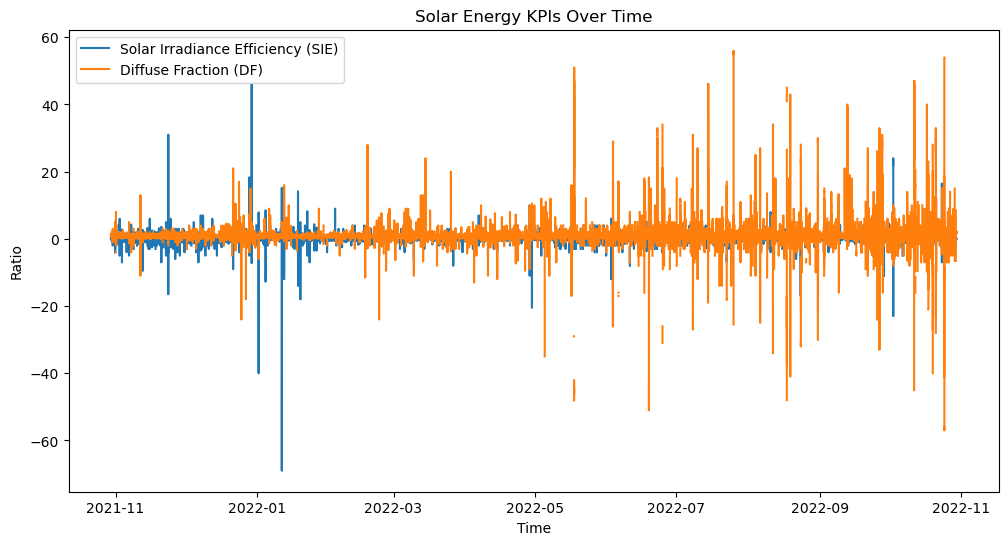

Analyze how cleaning impacts the module readings.
Cleaning Effectiveness (CE):
 ModA    1.323028
ModB    1.399887
dtype: float64
Visualize wind variability (WVI) and barometric pressure fluctuation.


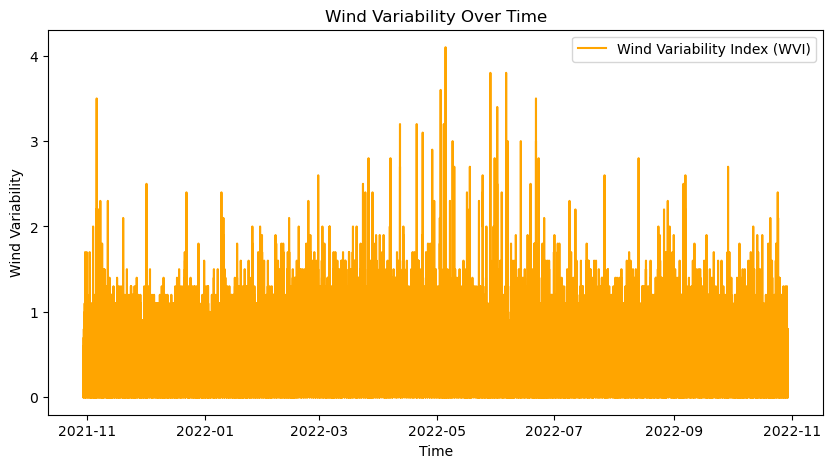

Aggregate KPIs to evaluate trends monthly or yearly.


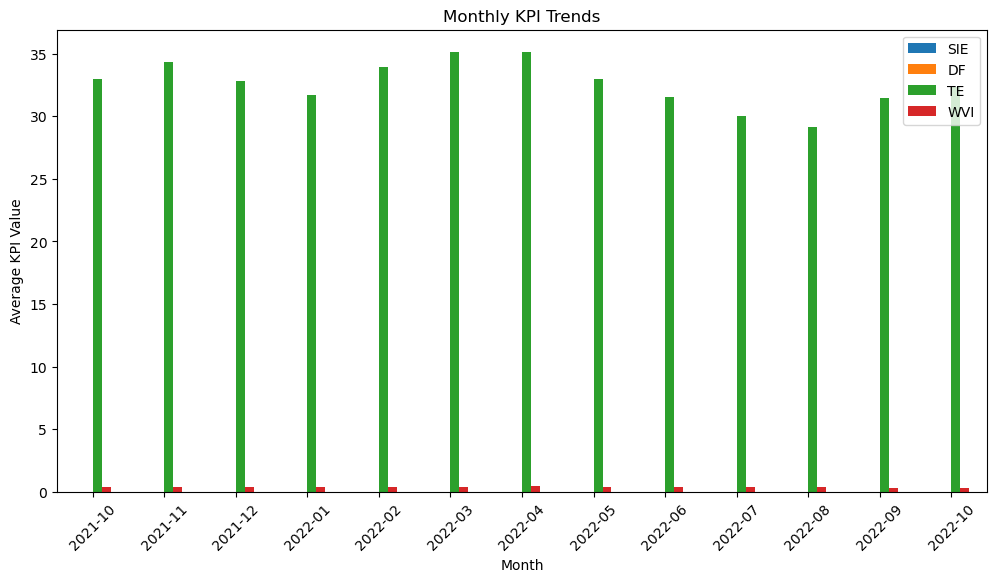

KPI for togo...
Plot the SIE and DF over time.


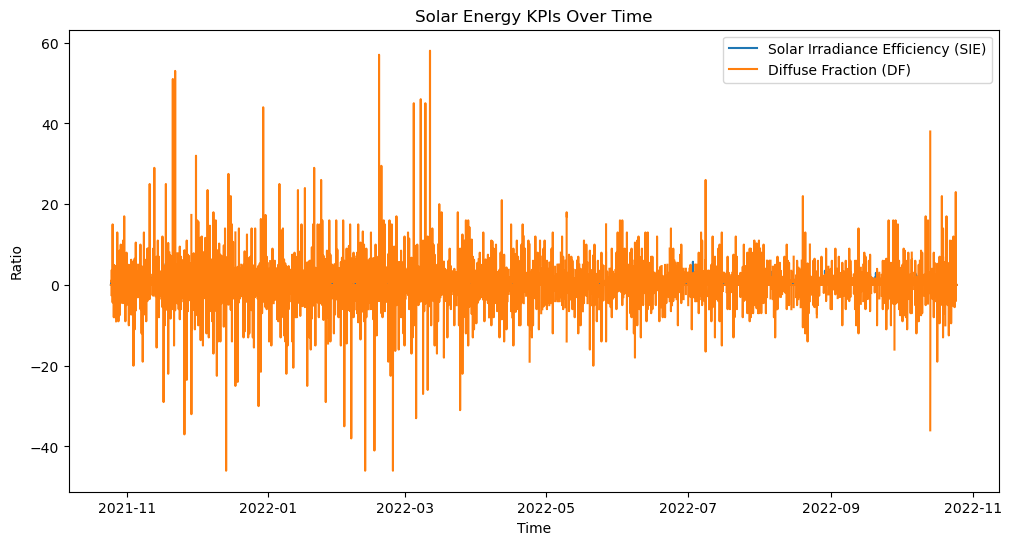

Analyze how cleaning impacts the module readings.
Cleaning Effectiveness (CE):
 ModA    2.368301
ModB    2.425745
dtype: float64
Visualize wind variability (WVI) and barometric pressure fluctuation.


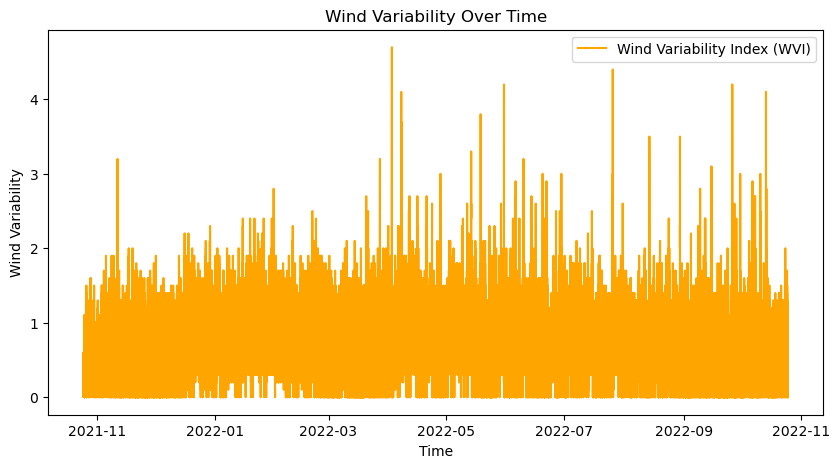

Aggregate KPIs to evaluate trends monthly or yearly.


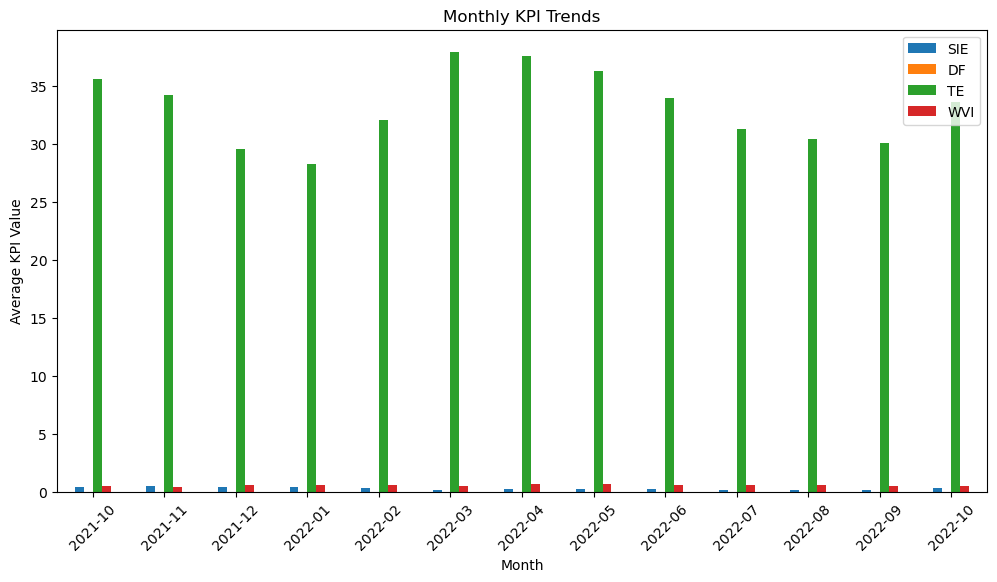

In [26]:


##visualization for the KPI data analysis


def visual(data):
    # Solar Energy Potential KPIs
    data['SIE'] = data['DNI'] / data['GHI']  # Solar Irradiance Efficiency
    data['DF'] = data['DHI'] / data['GHI']  # Diffuse Fraction

    data['TE'] = (data['TModA'] + data['TModB']) / 2  # Temperature Efficiency
    # Weather Impact KPIs
    data['WVI'] = data['WSstdev']  # Wind Variability Index
    
    print("Plot the SIE and DF over time.")
    plt.figure(figsize=(12, 6))
    plt.plot(data['Timestamp'], data['SIE'], label='Solar Irradiance Efficiency (SIE)')
    plt.plot(data['Timestamp'], data['DF'], label='Diffuse Fraction (DF)')
    plt.legend()
    plt.title("Solar Energy KPIs Over Time")
    plt.xlabel("Time")
    plt.ylabel("Ratio")
    plt.show()

    
    print("Analyze how cleaning impacts the module readings.")
    cleaned = data[data['Cleaning'] == 1]
    not_cleaned = data[data['Cleaning'] == 0]
    cleaning_effectiveness = (cleaned[['ModA', 'ModB']].mean() / not_cleaned[['ModA', 'ModB']].mean())
    print("Cleaning Effectiveness (CE):\n", cleaning_effectiveness)

    
    print("Visualize wind variability (WVI) and barometric pressure fluctuation.")
    plt.figure(figsize=(10, 5))
    plt.plot(data['Timestamp'], data['WVI'], label='Wind Variability Index (WVI)', color='orange')
    plt.title("Wind Variability Over Time")
    plt.xlabel("Time")
    plt.ylabel("Wind Variability")
    plt.legend()
    plt.show()

    
    print("Aggregate KPIs to evaluate trends monthly or yearly.")
    data['Month'] = data['Timestamp'].dt.to_period('M')
    monthly_kpis = data.groupby('Month')[['SIE', 'DF', 'TE', 'WVI']].mean()
    monthly_kpis.plot(kind='bar', figsize=(12, 6))
    plt.title("Monthly KPI Trends")
    plt.ylabel("Average KPI Value")
    plt.xlabel("Month")
    plt.xticks(rotation=45)
    plt.show()


print("KPI for benin...")
visual(benin)
print("KPI for sierraleone...")
visual(sierraleone)
print("KPI for togo...")
visual(togo)



    

    


## correlation Analysis

correlation for benin...


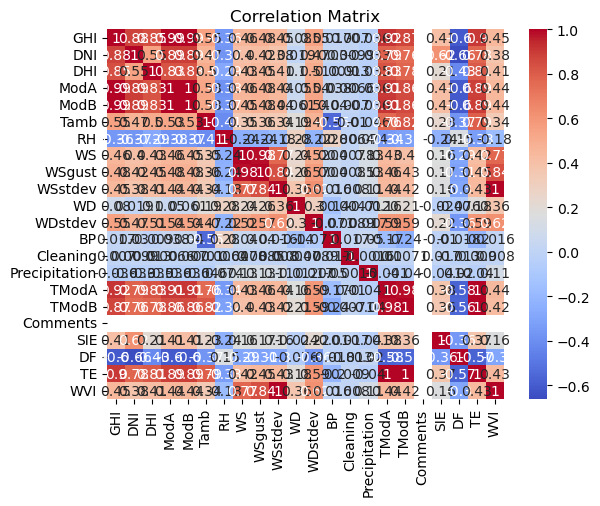

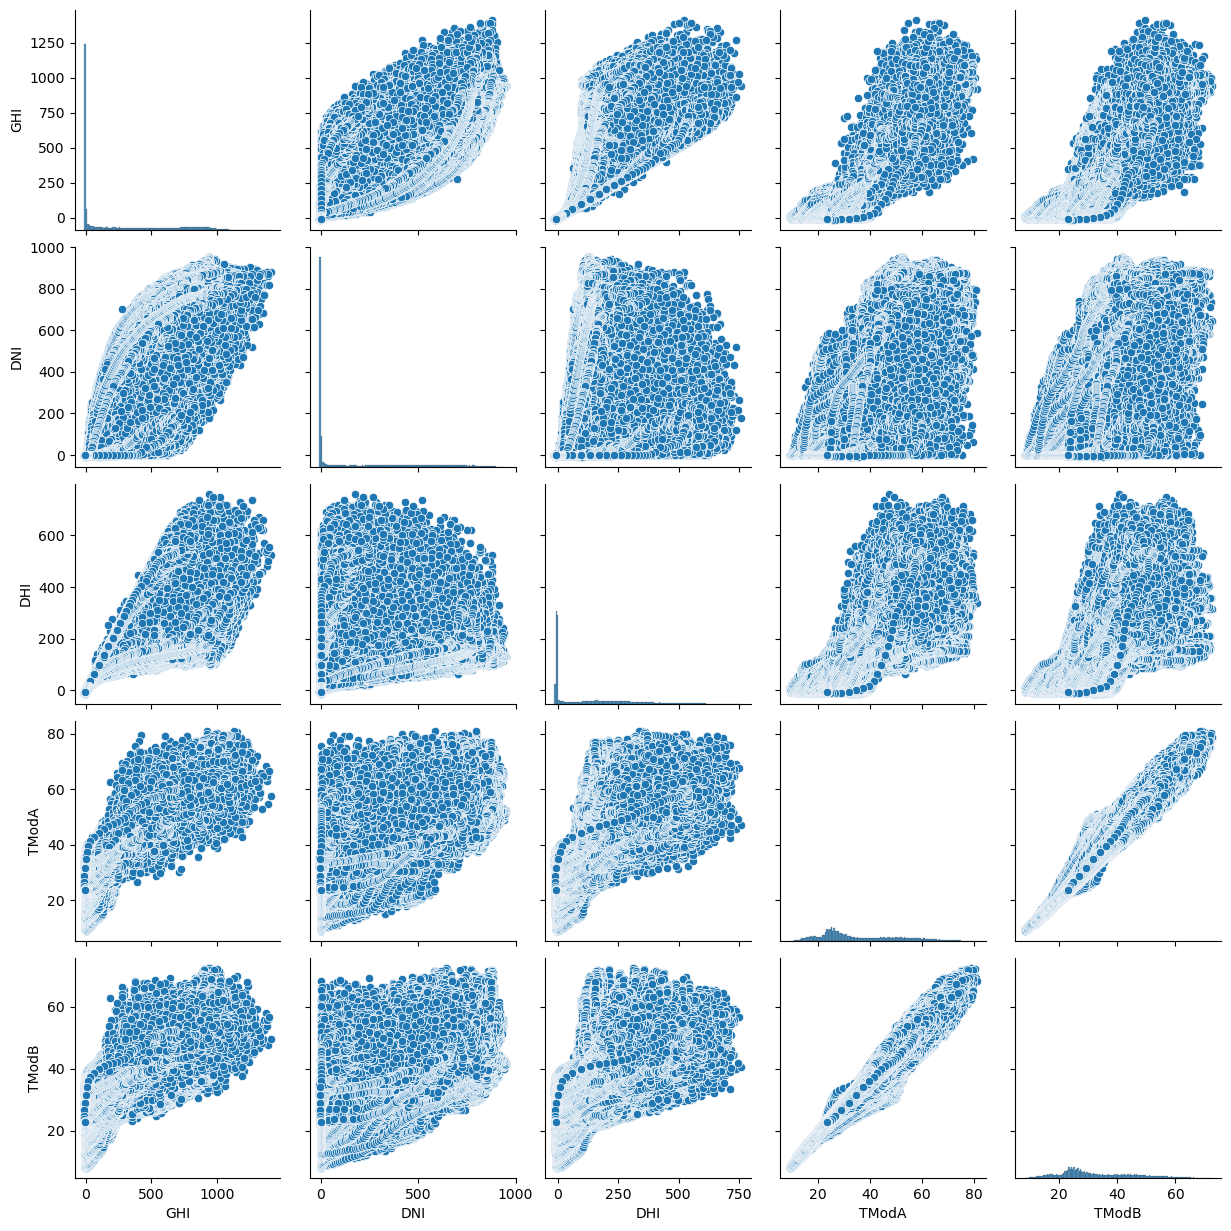

Correlation for sierraleone...


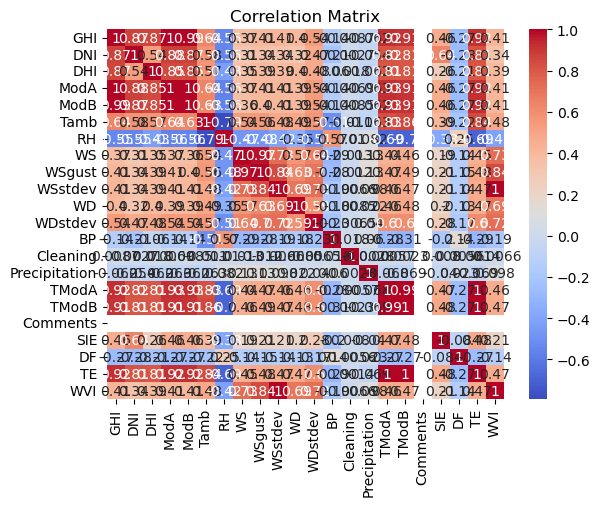

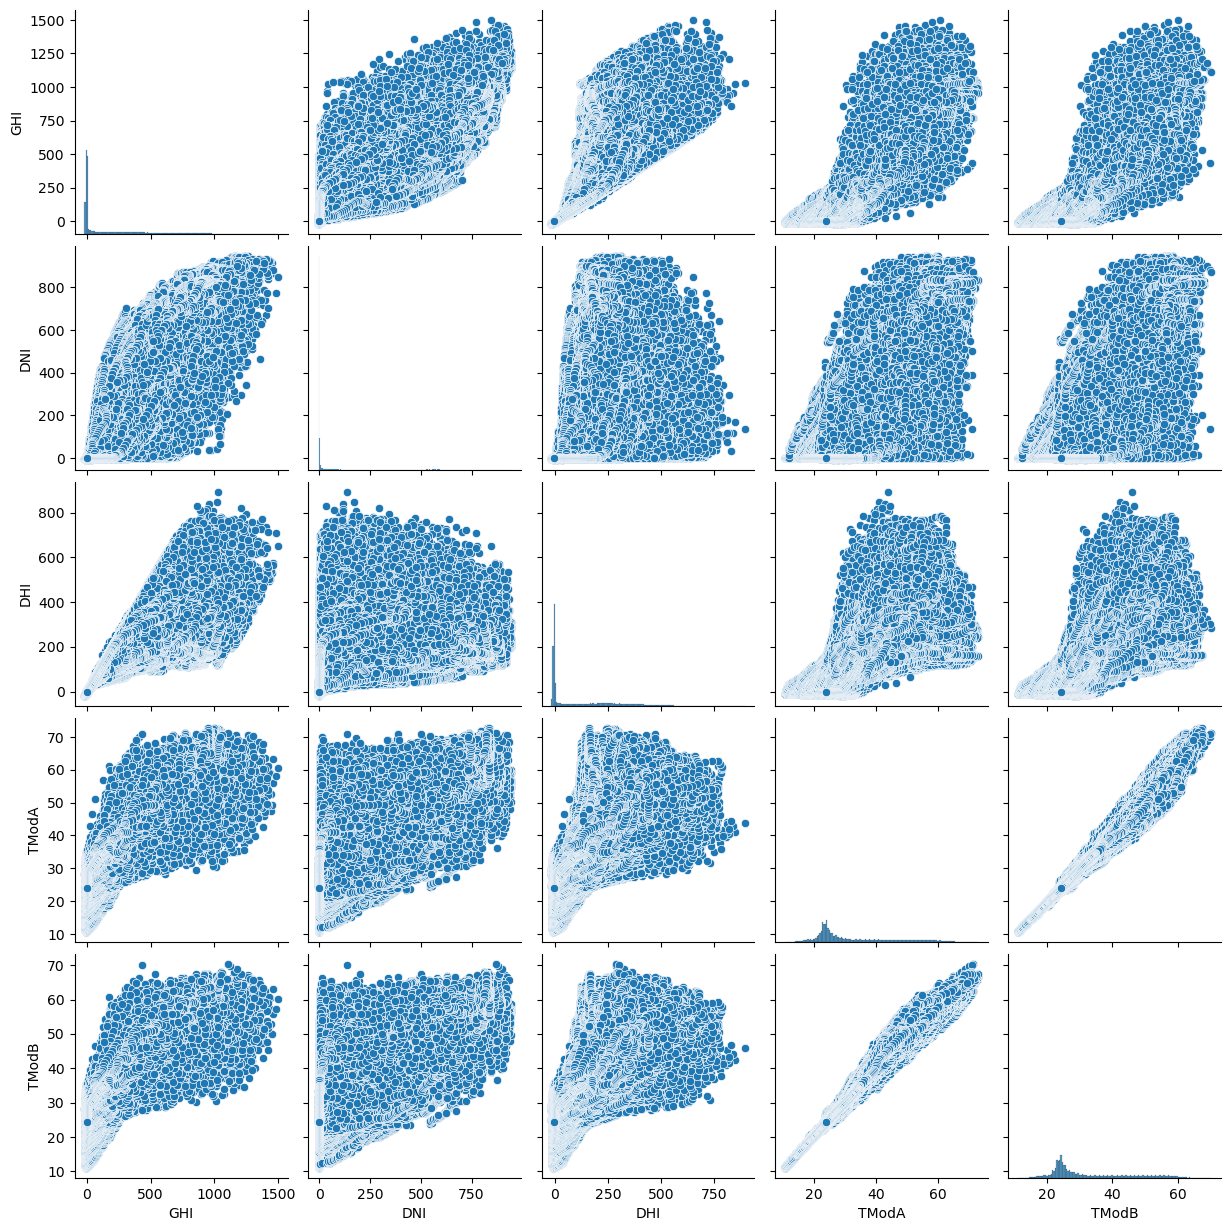

Correlation for togo...


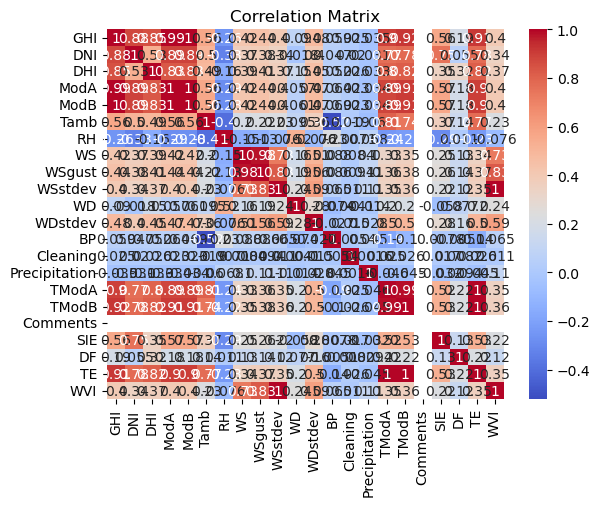

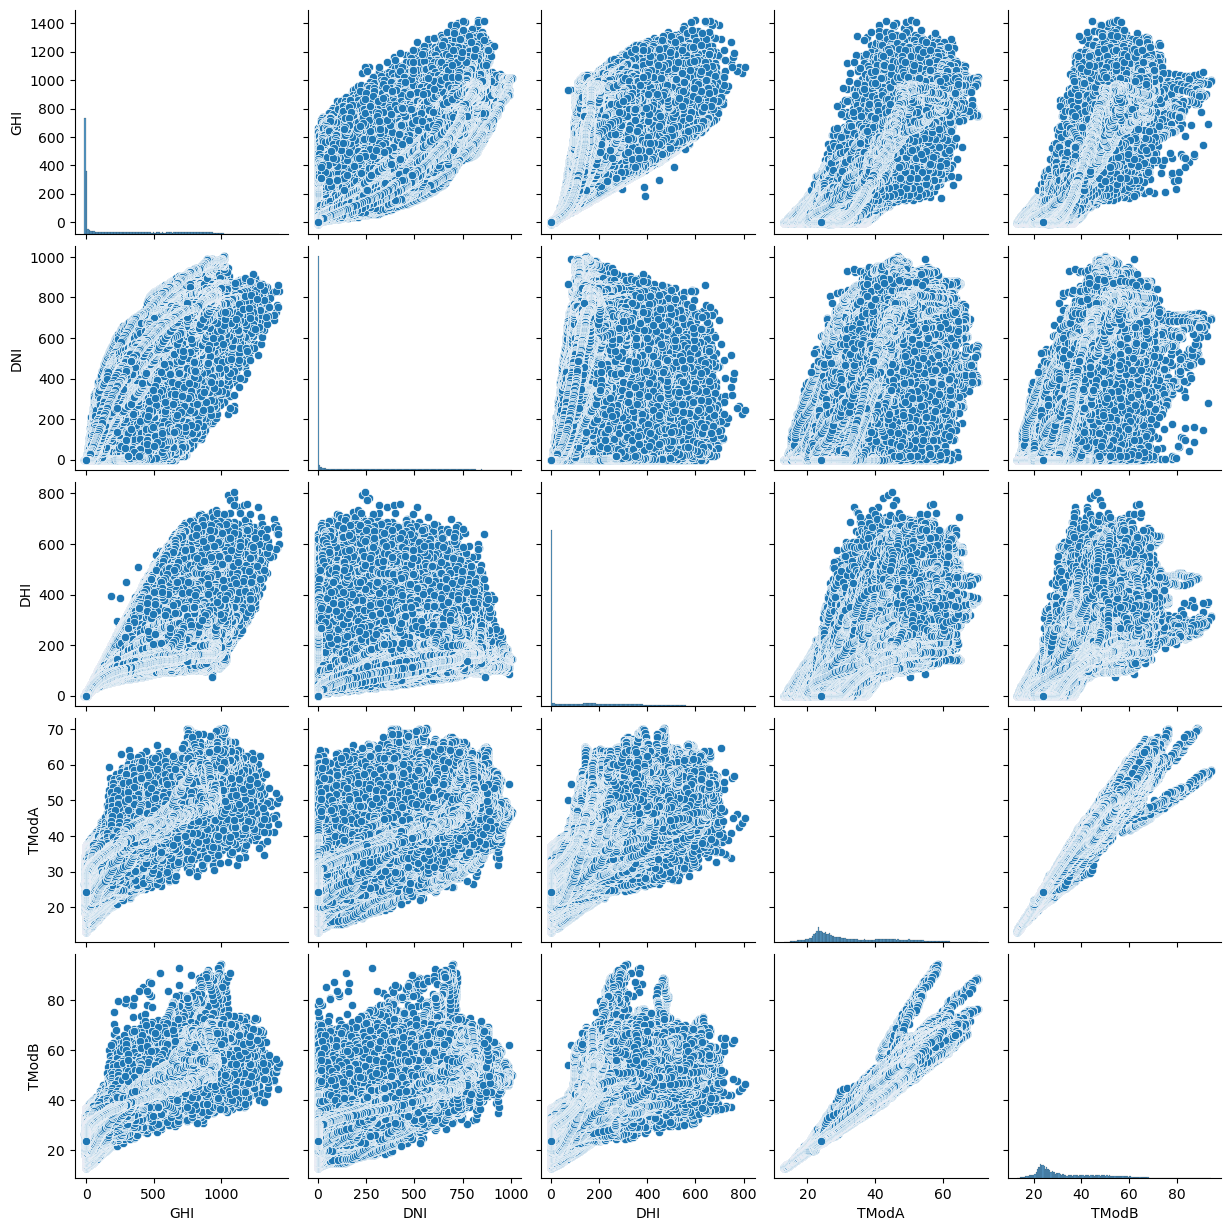

In [33]:
def cor(data):
    numeric_data = data.select_dtypes(include=[float, int])
    correlation_matrix = numeric_data.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title("Correlation Matrix")
    plt.show()

    ##Visualize relationships between key variables:
    sns.pairplot(data[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']])
    plt.show()

print("correlation for benin...")
cor(benin)
print("Correlation for sierraleone...")
cor(sierraleone)
print("Correlation for togo...")
cor(togo)
